In [1]:
%cd ..


/Users/eliaweiss/ai/segmentation/MobileSAM


In [2]:
import numpy as np
from tblDetect.TableDetect import TableDetect
from tblDetect.MobileSamBoxes import MobileSamBoxes
import matplotlib.pyplot as plt
from PIL import Image
from notebooks.Utils import plot_results, plot_annotations,plot_rotatedResult,plot_results_cells
from tblDetect.AlignTable_Processor import AlignTable_Processor
from tblDetect.TblStructureDetect import TblStructureDetect

/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with tinyvit.tiny_vit.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with tinyvit.tiny_vit.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with tinyvit.tiny_vit.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/Users/eliaweiss/ai/segmentation/MobileSAM/tinyvit/tiny_vit.py:656: U

In [3]:
# init detectors
tblDec = TableDetect()
sam = MobileSamBoxes()
tblStructDetect = TblStructureDetect()       

checkpoint_load_scucess


In [4]:
# file_path = "./app/assets/picture1.jpg"
file_path = "/Users/eliaweiss/Documents/doc2txt/sihach/attachments/img/20231025012642_001.jpg"
# file_path = "/Users/eliaweiss/Documents/doc2txt/sihach/need fix/4e7d4235deff4ee2b72d886e12ad0bcf.jpg"
# file_path = "/Users/eliaweiss/Documents/doc2txt/invoices 2/expense (6).jpeg"
img = Image.open(file_path)

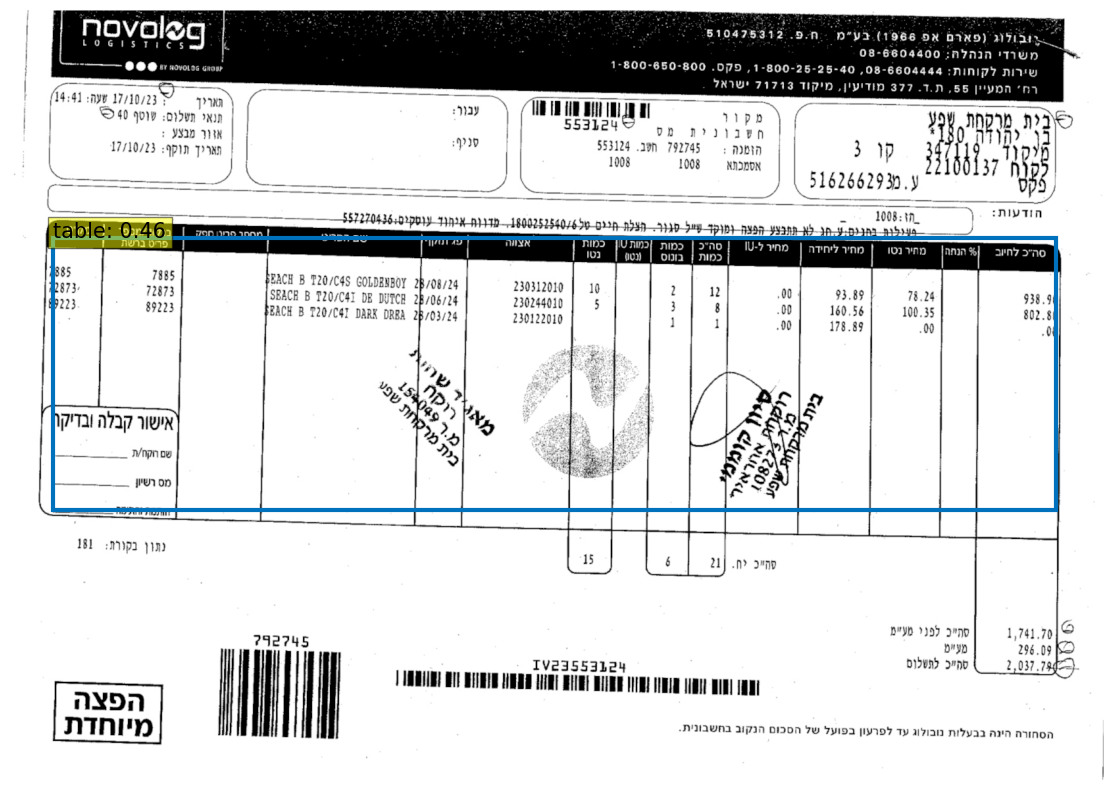

In [5]:
probas, boxes = tblDec.detectTables(img)
plot_results(tblDec.model, img, probas, boxes)


# Crop table with sam

shape (1201, 1706, 3)
------ total time: (s): 1.62


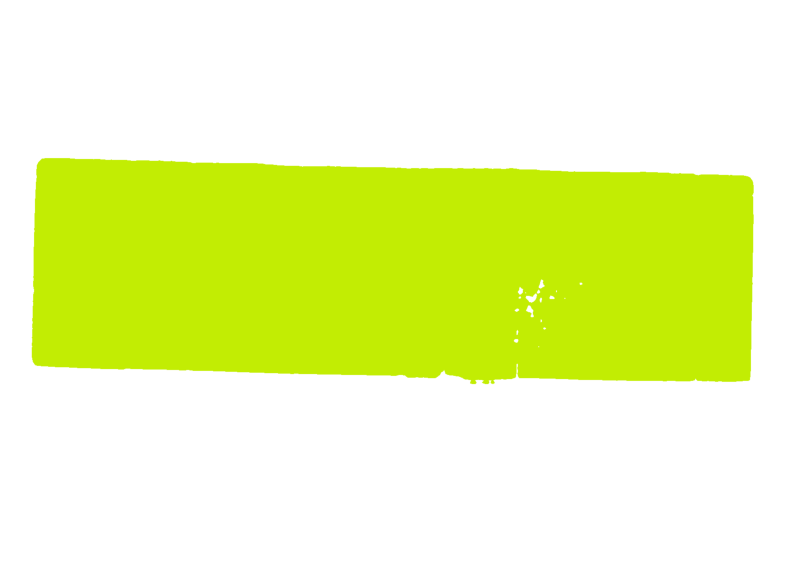

In [6]:
anns = sam.process(img,boxes)
plot_annotations(img, anns)

# align table

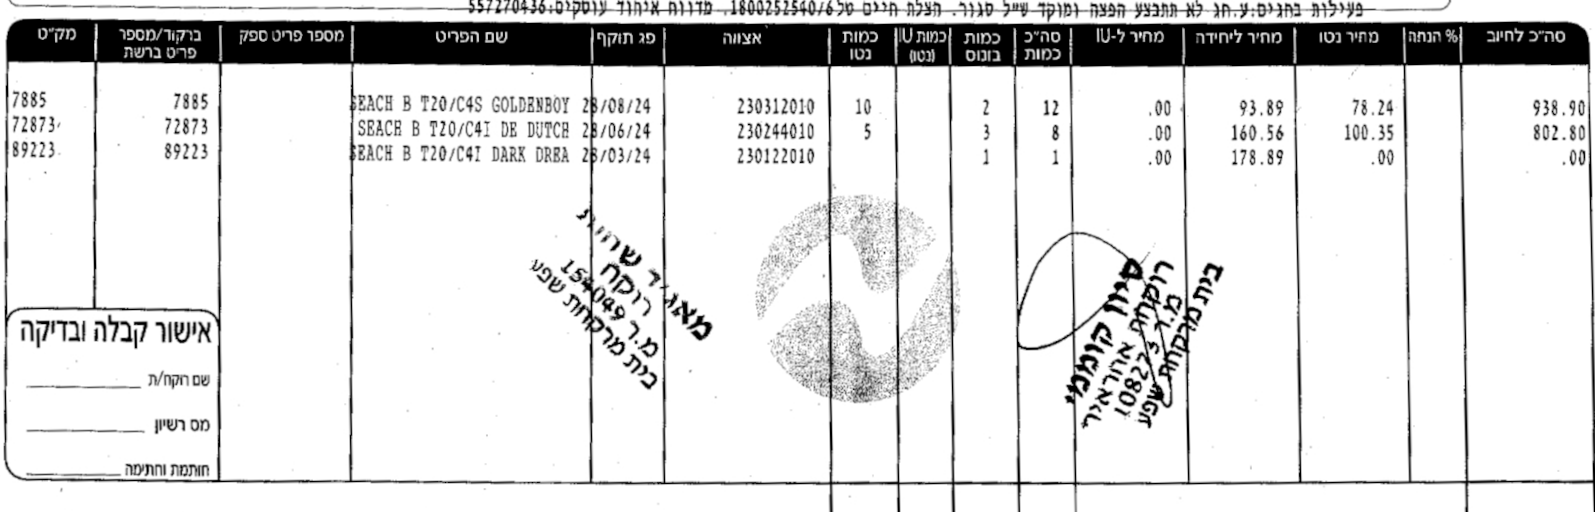

In [7]:
alignTable_processor = AlignTable_Processor(img, anns[0])
tbl_patch_pil = alignTable_processor.getAlignTable()
tbl_patch_pil


# Table structure recognition

In [8]:
cells = tblStructDetect.detectTableStructure(tbl_patch_pil)

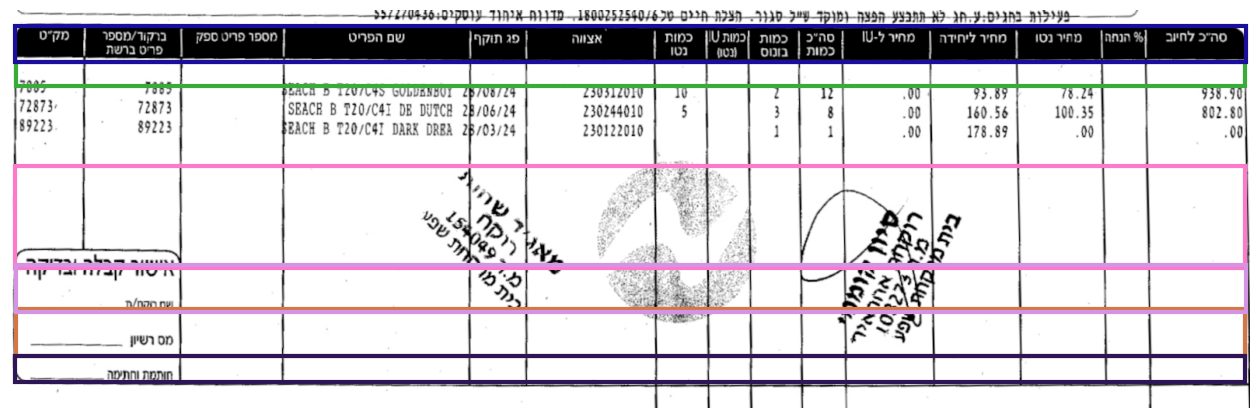

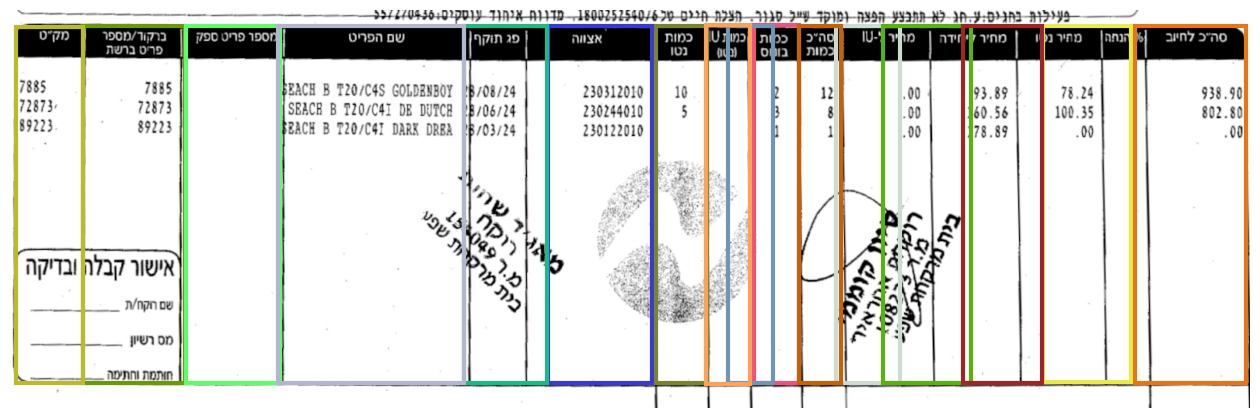

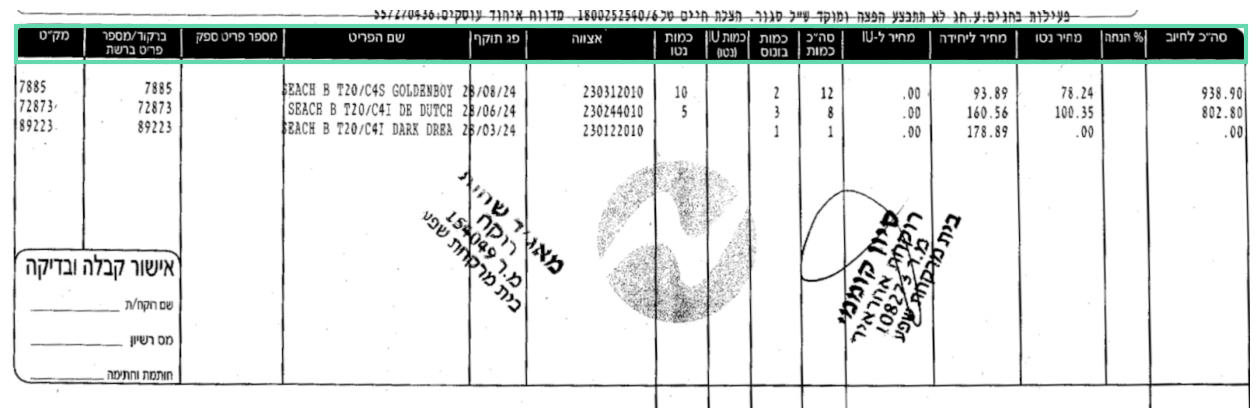

In [9]:
plot_results_cells(tblStructDetect, tbl_patch_pil,cells, class_to_visualize="table row")
plot_results_cells(tblStructDetect, tbl_patch_pil, cells, class_to_visualize="table column")
plot_results_cells(tblStructDetect, tbl_patch_pil,cells, class_to_visualize="table column header")

# Find the inverse rotate

In [10]:
rotated_cells =  alignTable_processor.unRotateAllCell(cells)
rotated_bbox = rotated_cells[0]['bbox']

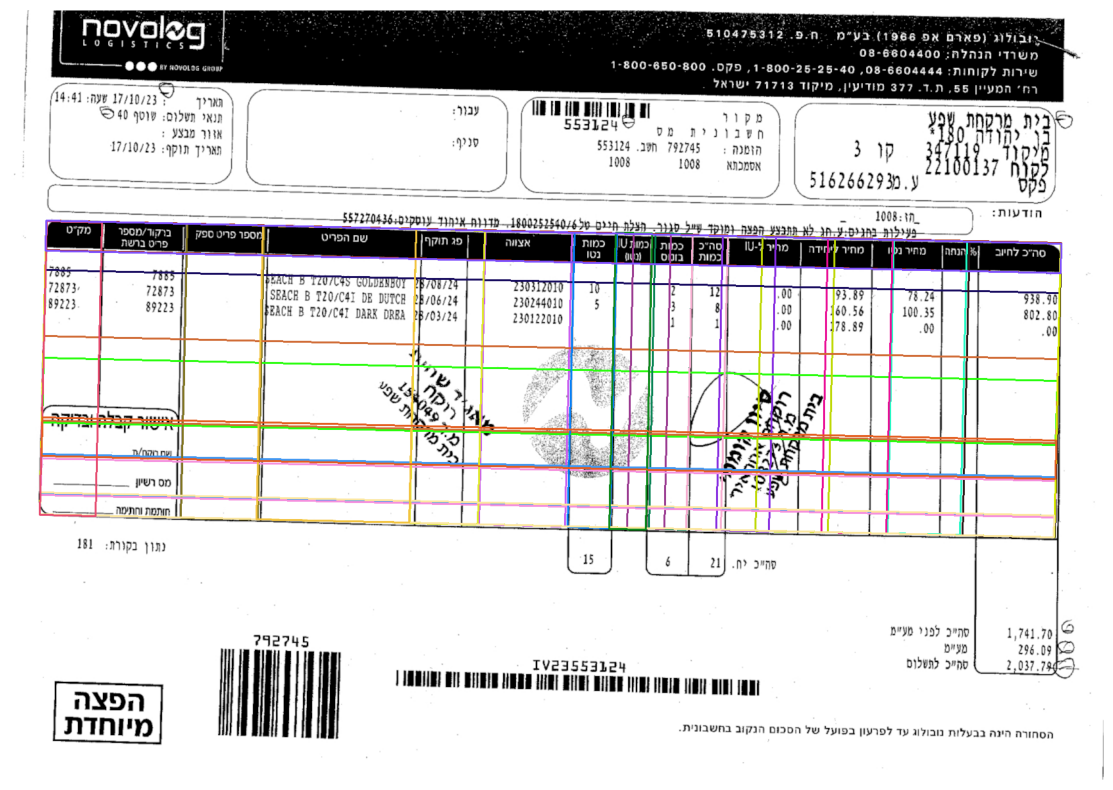

In [11]:

plot_rotatedResult(img, rotated_cells)